Saving 871.png to 871.png


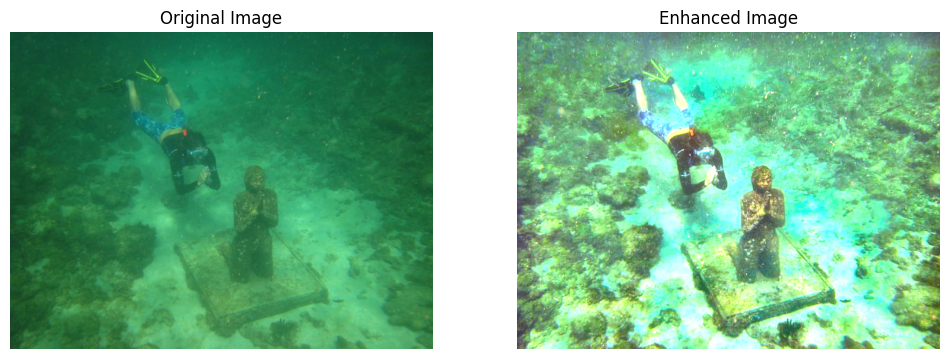

Entropy of Original Image: 6.7556367
Entropy of Enhanced Image: 7.293046


In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Install necessary libraries
!pip install opencv-python-headless

# Function to compute entropy of an image
def calculate_entropy(image):
    # Compute histogram of pixel intensities
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    # Calculate entropy using histogram
    log_hist = np.log2(hist + 1e-10)
    entropy = -np.sum(hist * log_hist)
    return entropy

# Function to perform SLIC superpixel segmentation
def perform_slic_segmentation(image, region_size=64, regularizer=0.001):
    # Initialize and iterate SLIC algorithm
    slic = cv2.ximgproc.createSuperpixelSLIC(image, cv2.ximgproc.SLICO, region_size, regularizer)
    slic.iterate()
    slic_enhanced = slic.enforceLabelConnectivity()
    num_segments = slic.getNumberOfSuperpixels()
    mask = slic_enhanced
    return mask, num_segments

# Function to perform color correction using simple adjustment
def adjust_contrast_brightness(image, alpha=1.5, beta=30):
    # Adjust contrast and brightness of the image
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

# Function to perform contrast enhancement using CLAHE
def enhance_contrast(image):
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    lab_planes = cv2.split(lab_image)
    lab_planes_list = [clahe.apply(plane) for plane in lab_planes]
    lab_corrected = cv2.merge(lab_planes_list)
    # Convert back to BGR color space
    return cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

# Main function to apply SUIEM algorithm
def apply_suiem(image, region_size=64, regularizer=0.001):
    # Perform superpixel segmentation
    mask, num_segments = perform_slic_segmentation(image, region_size, regularizer)
    # Apply contrast enhancement
    contrast_enhanced_image = enhance_contrast(image)
    # Apply contrast and brightness adjustment
    adjusted_image = adjust_contrast_brightness(contrast_enhanced_image)
    return adjusted_image

# Upload image file
uploaded = files.upload()

# Load and process underwater image
input_image_path = list(uploaded.keys())[0]
input_image = cv2.imread(input_image_path)
enhanced_image = apply_suiem(input_image)

# Compute entropy of original and enhanced images
entropy_original = calculate_entropy(cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY))
entropy_enhanced = calculate_entropy(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY))

# Display original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Enhanced Image')
axes[1].axis('off')
plt.show()

# Print entropy values
print("Entropy of Original Image:", entropy_original)
print("Entropy of Enhanced Image:", entropy_enhanced)


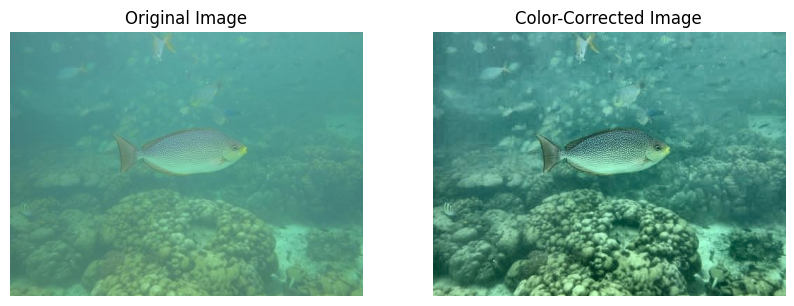

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform histogram equalization for color correction
def histogram_equalization(image):
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # Split the LAB image into channels
    l, a, b = cv2.split(lab_image)
    # Apply histogram equalization to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    # Merge the enhanced L channel with the original A and B channels
    lab_eq = cv2.merge((l_eq, a, b))
    # Convert the LAB image back to BGR color space
    enhanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)
    return enhanced_image

# Load the underwater image
input_image_path = '/content/850.png'
input_image = cv2.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to load image '{input_image_path}'")
else:
    # Perform histogram equalization for color correction
    color_corrected_image = histogram_equalization(input_image)
    # Display the original and color-corrected images
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2RGB))
    plt.title('Color-Corrected Image')
    plt.axis('off')

    plt.show()


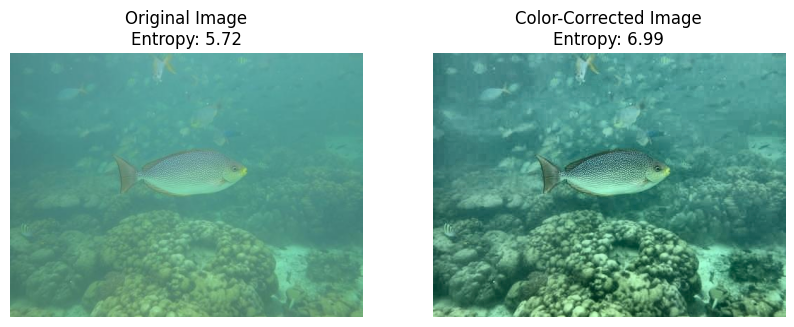

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform histogram equalization for color correction
def histogram_equalization(image):
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # Split the LAB image into channels
    l, a, b = cv2.split(lab_image)
    # Apply histogram equalization to the L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    # Merge the enhanced L channel with the original A and B channels
    lab_eq = cv2.merge((l_eq, a, b))
    # Convert the LAB image back to BGR color space
    enhanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)
    return enhanced_image

# Function to calculate entropy of an image
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    log_hist = np.log2(hist + 1e-10)
    entropy = -np.sum(hist * log_hist)
    return entropy

# Load the underwater image
input_image_path = '/content/850.png'
input_image = cv2.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to load image '{input_image_path}'")
else:
    # Perform histogram equalization for color correction
    color_corrected_image = histogram_equalization(input_image)

    # Calculate entropy of the original and color-corrected images
    entropy_original = calculate_entropy(cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY))
    entropy_corrected = calculate_entropy(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2GRAY))

    # Display the original and color-corrected images
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image\nEntropy: {entropy_original:.2f}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Color-Corrected Image\nEntropy: {entropy_corrected:.2f}')
    plt.axis('off')

    plt.show()


In [7]:
!pip install opencv-python-headless
!pip install matplotlib


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def histogram_equalization(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)
    lab_eq = cv2.merge((l_eq, a, b))
    enhanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)
    return enhanced_image


In [10]:
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    log_hist = np.log2(hist + 1e-10)
    entropy = -np.sum(hist * log_hist)
    return entropy


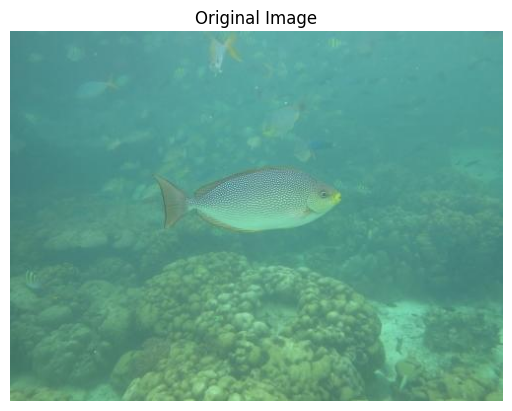

In [11]:
input_image_path = '/content/850.png'
input_image = cv2.imread(input_image_path)

if input_image is None:
    print(f"Error: Unable to load image '{input_image_path}'")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()


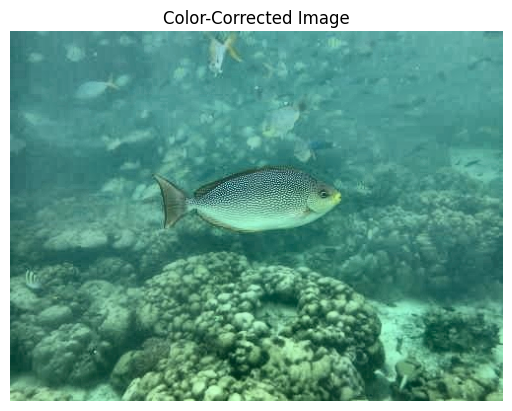

In [12]:
color_corrected_image = histogram_equalization(input_image)

plt.imshow(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Color-Corrected Image')
plt.axis('off')
plt.show()


In [13]:
entropy_original = calculate_entropy(cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY))
entropy_corrected = calculate_entropy(cv2.cvtColor(color_corrected_image, cv2.COLOR_BGR2GRAY))

print("Entropy of Original Image:", entropy_original)
print("Entropy of Color-Corrected Image:", entropy_corrected)


Entropy of Original Image: 5.723079
Entropy of Color-Corrected Image: 6.9877014


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def white_balance(image):
    result = cv2.xphoto.createSimpleWB()
    corrected_image = result.balanceWhite(image)
    return corrected_image


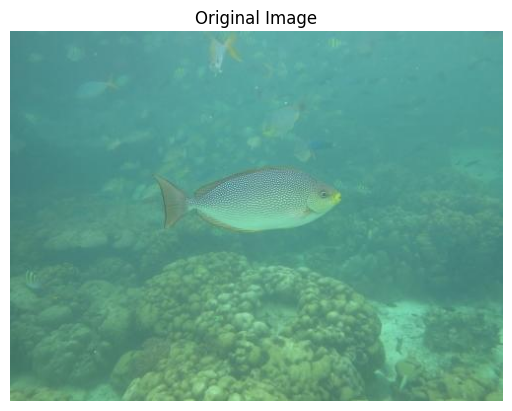

In [16]:
input_image_path = '/content/850.png'
input_image = cv2.imread(input_image_path)

if input_image is None:
    print(f"Error: Unable to load image '{input_image_path}'")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()


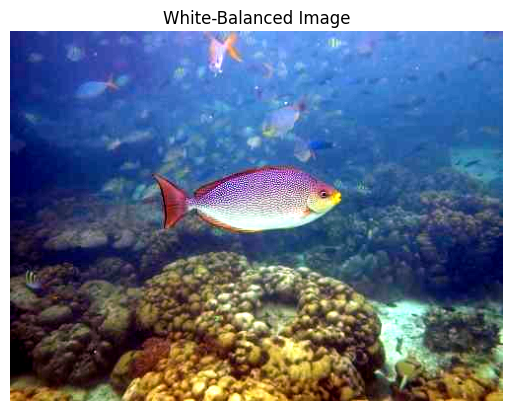

In [17]:
white_balanced_image = white_balance(input_image)

plt.imshow(cv2.cvtColor(white_balanced_image, cv2.COLOR_BGR2RGB))
plt.title('White-Balanced Image')
plt.axis('off')
plt.show()


In [18]:
entropy_original = calculate_entropy(cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY))
entropy_white_balanced = calculate_entropy(cv2.cvtColor(white_balanced_image, cv2.COLOR_BGR2GRAY))

print("Entropy of Original Image:", entropy_original)
print("Entropy of White-Balanced Image:", entropy_white_balanced)


Entropy of Original Image: 5.723079
Entropy of White-Balanced Image: 7.5031314


Saving 871.png to 871 (1).png


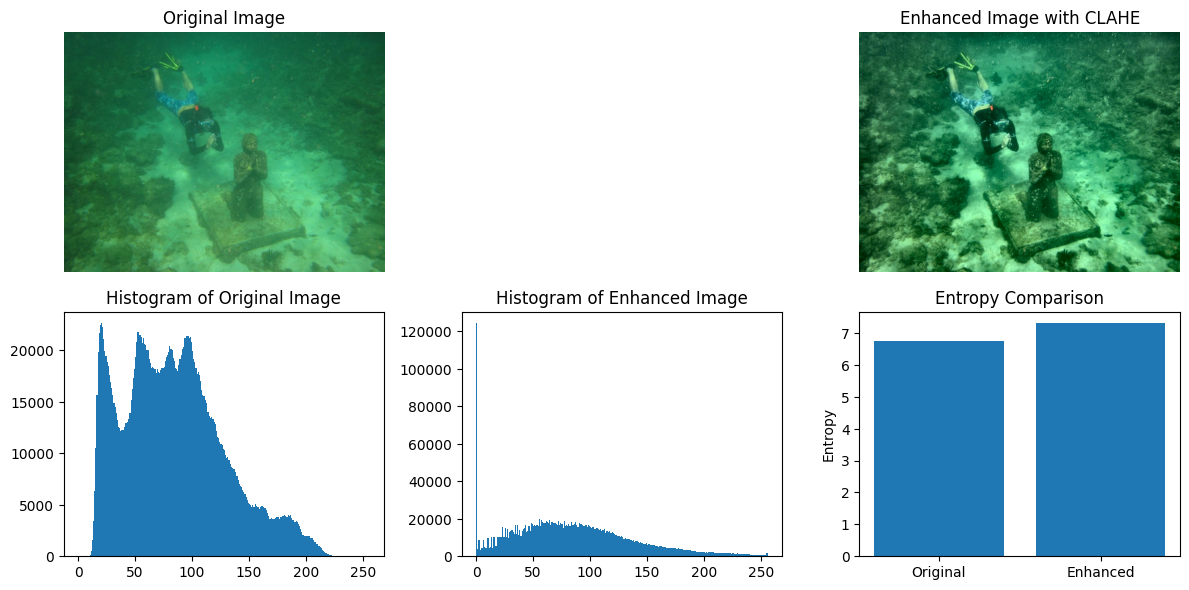

In [35]:
# Step 1: Install necessary libraries
!pip install opencv-python-headless
!pip install matplotlib

# Step 2: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Function to compute entropy of an image
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    log_hist = np.log2(hist + 1e-10)
    entropy = -np.sum(hist * log_hist)
    return entropy

# Step 4: Function for SLIC superpixel segmentation
def perform_slic_segmentation(image, region_size=64, regularizer=0.001):
    slic = cv2.ximgproc.createSuperpixelSLIC(image, cv2.ximgproc.SLICO, region_size, regularizer)
    slic.iterate()
    slic_enhanced = slic.enforceLabelConnectivity()
    mask = slic_enhanced
    return mask

# Step 5: Function for contrast enhancement using CLAHE
def apply_clahe(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    enhanced_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    return enhanced_image

# Step 6: Upload an underwater image
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]
input_image = cv2.imread(input_image_path)

if input_image is None:
    print(f"Error: Unable to load image '{input_image_path}'")
else:
    # Step 7: Perform SLIC segmentation
    segmented_mask = perform_slic_segmentation(input_image)

    # Step 8: Apply CLAHE for contrast enhancement
    enhanced_image = apply_clahe(input_image)

    # Step 9: Calculate entropy of original and enhanced images
    entropy_original = calculate_entropy(cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY))
    entropy_enhanced = calculate_entropy(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY))

    # Step 10: Display results
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')



    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image with CLAHE')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.hist(input_image.ravel(), 256, [0, 256])
    plt.title('Histogram of Original Image')

    plt.subplot(2, 3, 5)
    plt.hist(enhanced_image.ravel(), 256, [0, 256])
    plt.title('Histogram of Enhanced Image')

    plt.subplot(2, 3, 6)
    plt.bar(['Original', 'Enhanced'], [entropy_original, entropy_enhanced])
    plt.title('Entropy Comparison')
    plt.ylabel('Entropy')

    plt.tight_layout()
    plt.show()


In [22]:
!pip install opencv-python-headless
!pip install matplotlib


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [24]:
def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result


In [25]:
def apply_clahe(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    enhanced_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    return enhanced_image


In [26]:
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()
    log_hist = np.log2(hist + 1e-10)
    entropy = -np.sum(hist * log_hist)
    return entropy


Saving 807.png to 807.png


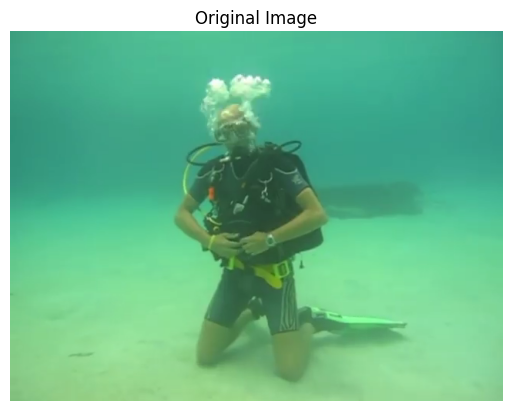

In [31]:
from google.colab import files
uploaded = files.upload()

input_image_path = list(uploaded.keys())[0]
input_image = cv2.imread(input_image_path)

if input_image is None:
    print(f"Error: Unable to load image '{input_image_path}'")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()


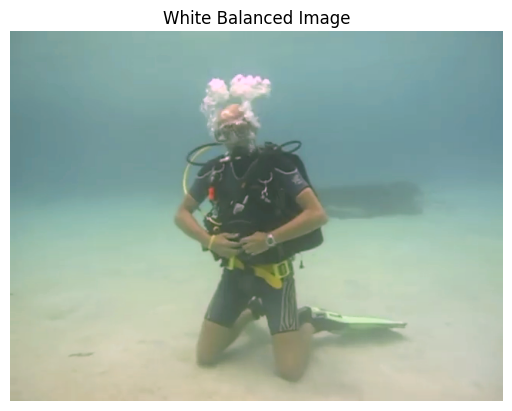

In [32]:
white_balanced_image = white_balance(input_image)

plt.imshow(cv2.cvtColor(white_balanced_image, cv2.COLOR_BGR2RGB))
plt.title('White Balanced Image')
plt.axis('off')
plt.show()


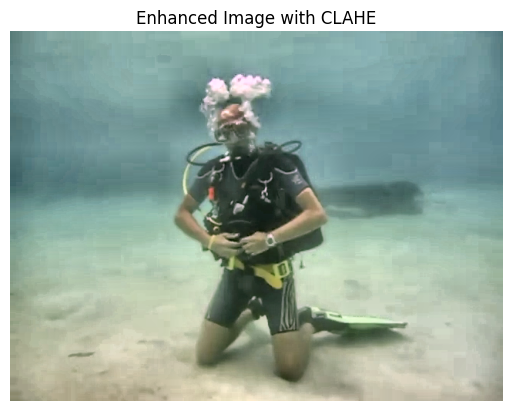

In [33]:
enhanced_image = apply_clahe(white_balanced_image)

plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image with CLAHE')
plt.axis('off')
plt.show()


In [34]:
entropy_original = calculate_entropy(cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY))
entropy_enhanced = calculate_entropy(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY))

print("Entropy of Original Image:", entropy_original)
print("Entropy of Enhanced Image:", entropy_enhanced)


Entropy of Original Image: 6.5731215
Entropy of Enhanced Image: 7.2346597
